In [19]:
from gurobipy import *
import matplotlib.pyplot as plt
import networkx as nx

In [20]:
f = open("data.txt", "r")
line = f.readline()
line = line.strip('\n')
data = line.split(':')
num_nodes = int(data[1])
line = f.readline()
line = line.strip('\n')
data = line.split(':')
num_arcs = int(data[1])
line = f.readline()
line = line.strip('\n')
data = line.split(':')
origin = int(data[1])
line = f.readline()
line = line.strip('\n')
data = line.split(':')
destination = int(data[1])
line = f.readline()
line = f.readline()

links = tuplelist()
cost  = {}
while(len(line)):
    line = line.strip('\n')
    data = line.split()
    from_node = int(data[0])
    to_node = int(data[1])
    cost_arc = float(data[2])
    links.append((from_node,to_node))
    cost[from_node, to_node] = cost_arc
    line = f.readline()
f.close() 

In [21]:
from_node, to_node, cost_arc, links, cost

(5,
 6,
 2.0,
 <gurobi.tuplelist (9 tuples, 2 values each):
  ( 1 , 2 )
  ( 1 , 3 )
  ( 2 , 3 )
  ( 2 , 4 )
  ( 2 , 5 )
  ( 3 , 5 )
  ( 4 , 6 )
  ( 5 , 4 )
  ( 5 , 6 )
 >,
 {(1, 2): 2.0,
  (1, 3): 4.0,
  (2, 3): 1.0,
  (2, 4): 4.0,
  (2, 5): 2.0,
  (3, 5): 3.0,
  (4, 6): 2.0,
  (5, 4): 3.0,
  (5, 6): 2.0})

In [22]:
cost

{(1, 2): 2.0,
 (1, 3): 4.0,
 (2, 3): 1.0,
 (2, 4): 4.0,
 (2, 5): 2.0,
 (3, 5): 3.0,
 (4, 6): 2.0,
 (5, 4): 3.0,
 (5, 6): 2.0}

In [35]:
m = Model('SP')
x = m.addVars(links, obj=cost, name ="flow")

In [36]:
origin, destination

(1, [5, 6])

In [40]:
destination = [3, 6]

In [41]:
for i in range(1, num_nodes+1):
    m.addConstr(sum(x[i,j] for i,j in links.select(i, '*')) - sum(x[j,i] for j,i in links.select('*',i)) == 
                     (2 if i==origin else -1 if i in destination else 0 ),'node%s_' % i )

m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 12 rows, 9 columns and 36 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+01   2.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible model


In [42]:
if m.status == GRB.Status.OPTIMAL:
    print('The final solution is:')
    for i,j in links:
        if(x[i,j].x > 0):
            print(i, j, x[i,j].x)

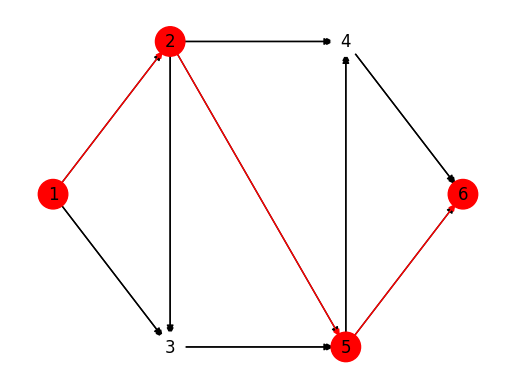

In [16]:
G=nx.DiGraph()
list_nodes = list(range(1, num_nodes+1))
G.add_nodes_from(list_nodes)
for i,j in links:
    G.add_edge(i,j)

# Adding the position attribute to each node
node_pos = {1: (0, 0), 2: (2, 2), 3: (2, -2), 4: (5, 2), 5: (5, -2), 6: (7, 0)}

# Create a list of edges in shortest path
red_edges = [(i,j) for i,j in links if x[i,j].x > 0]

#Create a list of nodes in shortest path
sp = [ i for i,j in links if x[i,j].x > 0 ]
sp.append(destination)

# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['white' if not node in sp else 'red' for node in G.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G.edges()]
# Draw the nodes
nx.draw_networkx(G, node_pos, node_color= node_col, node_size=450)
# Draw the node labels
# nx.draw_networkx_labels(G1, node_pos,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G, node_pos,edge_color= edge_col)
# Draw the edge labels
# nx.draw_networkx_edge_labels(G, node_pos, edge_labels=cost)
# Remove the axis
plt.axis('off')

# Show the plot
plt.show()